#### INFO7390 Adv Data Sci  
## **Mini Project 2 - Causal Inference**  
    
Name: Fangqing Wu  
NUID: 001305642

---
**License**  
This project is licensed under [MIT License](https://raw.githubusercontent.com/fwqfwq/dataset/master/MIT%20License)
\
\
**Links**  
Google Colab: https://colab.research.google.com/drive/1zxApJ_wF1YlUdy08crKCe1zDxayAa2nm?usp=sharing 

Dataset: Heart Failure Prediction https://www.kaggle.com/andrewmvd/heart-failure-clinical-data   





 ---
### **Abstract**  
'Correlations are not causations'.  
Causal inference is a significant part in interpretability for machine learning. Not all high scores for correlations represent the very true causations, due to the confounders, or even, bias. 

In this project the methods for causation and its sub-themes counterfactual would be applied and compared the different performance on regression models and the nerual network models. 

---


### **Causal Inference**

This topic is talking after my mini1 project, interpretability.   
Two parts are included as below:  
* conception 
* implementation on dataset 


####**Conception**
'What If?'  
This is the most representative expression for 'Causality", which is basically answering questions about why something happened.   

**Causal Inference**, involving with cause & effect (treatment & outcomes), is an essential tool to extract information from data, analysing the response of the effect variable when the cause is changed, and to see whether the correlation is enough for inference.   




Three-level hierarchy of causality[2] are:
1. Association  : Seeing  
$P(y|x)$  
Statistical relationship among data.   

2. Intervention  : Doing   
$P(y| do(x), z)$  
'What if': hypothesis with a changed value and an unclear output. 

3. Counterfactuals  : Imaging, Retrospecting  
$P(y_{x}|x', y')$  
Another 'what if', but in a retrosoecting way. 




**Causal Flow Chart**  
(Using causalgraphicalmodels)

In [ ]:
!pip install causalgraphicalmodels

In [ ]:
from causalgraphicalmodels import CausalGraphicalModel

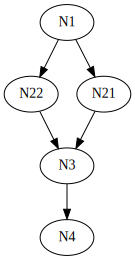

In [ ]:
sprinkler = CausalGraphicalModel(
    nodes=["N1", "N21", "N22", "N3", "N4"],
    edges=[
        ("N1", "N21"), 
        ("N1", "N22"), 
        ("N21", "N3"),
        ("N22", "N3"), 
        ("N3", "N4")
    ]
)

# draw return a graphviz `dot` object, which jupyter can render
sprinkler.draw()

***Fundamental Problem of Causal Inference***[3] 

First, let's see Rubin's Model. [wiki](https://en.wikipedia.org/wiki/Rubin_causal_model)   
The Rubin causal model is based on the idea of potential outcomes. For example, a person would have a particular income at age 40 if she had attended college, whereas she would have a different income at age 40 if she had not attended college. To measure the causal effect of going to college for this person, we need to compare the outcome for the same individual in both alternative futures. Since it is impossible to see both potential outcomes at once, one of the potential outcomes is always missing. This dilemma is the "fundamental problem of causal inference".

Take three elements as example X, T, Y:   
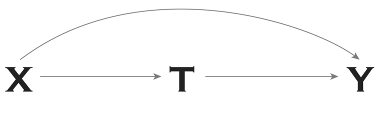


X is the causation of T, T is the causation of Y.   
Yet, still part of X related to Y. For example, a man with a poor health plan and a long-time smkoing habit, if he would be diagnosed with lung cancer, neither sole reason could be atrributed to arbitrarily.  


The outcomes would be overlapped and not ideal for the measurement. 


***Confounder***  
When the aforementioned elements exist, the whole relationship among data is not 'pure', which is also called 'confounding' in statistics. Confoundings would be unmeasured when unobserved feature exists.   

### **Implementation** 


#### **Dataset Introduction** 

The main data repository consists of:  
>| Featrue | Description | | Featrue | Description | | Featrue | Description |
| ----------- | ----------- | | ----------- | ----------- | | ----------- | ----------- |
| 'age' | Age | | 'anaemia' | Decrease of red blood cells or hemoglobin (boolean) | | 'creatinine_phosphokinase' | Level of the CPK enzyme in the blood (mcg/L) |
| 'diabetes' | If the patient has diabetes (boolean) | | 'ejection_fraction' | Percentage of blood leaving the heart at each contraction (percentage) | | 'high_blood_pressure' | If the patient has hypertension (boolean)  |
| 'platelets' | Platelets in the blood (kiloplatelets/mL) | | 'serum_creatinine' | Level of serum creatinine in the blood (mg/dL) | | 'serum_sodium' | Level of serum sodium in the blood (mEq/L) |
| 'sex' | Woman or man (binary) || 'smoking' | If the patient smokes or not (boolean) |  | 'time' | Follow-up period (days) | 
| 'DEATH_EVENT' | If the patient deceased during the follow-up period (boolean) | 



Total with 13 features; and the target is \``DEATH_EVENT`\`.   

   
#### **Dataset Exploration & Preprocessing** 

0\. Import part 

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import warnings
import random
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import r2_score, mean_squared_error, roc_curve, auc, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics.scorer import make_scorer

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



1\. First, a direct perception for dataset.

Load the dataset from github -- heart failure reords

In [ ]:
url = 'https://raw.githubusercontent.com/fwqfwq/dataset/master/heart_failure_clinical_records_dataset.csv'
dataset = pd.read_csv(url)
print(dataset.columns.values)

['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time' 'DEATH_EVENT']


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


As shown, the records are all intact. 

In [ ]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In this description, my concern is on the feature \``creatinine_phosphokinase`\` (CPK), with a seems-like abnormal distribution.  

\

Then using the head(), to see 10examples of the dataset. 

In [ ]:
dataset.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


\
#### **Data Visulizaitons**  
Several visualizations for disreibutions and relationship among this dataset. 

1. Histograms for the sight of data distributions for all the features.   
  *Using iloc function to exclude target feature \``DEATH_EVENT`\`(binary).*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43acf311d0>,
      dtype=object)

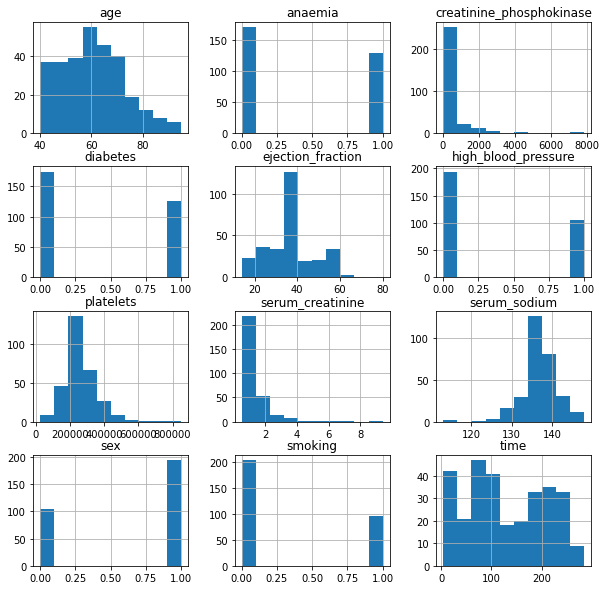

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
dataset.iloc[:,:-1].hist(ax = ax)

As shown,   
  i. Binary features: \``anaemia`\`, \``diabetes`\`, \``high_blood_pressure`\`, \``sex`\`, \``smoking`\`  
  ii. Normal Distribution features: \``platelets`\`, \``serum_sodium`\`  
  iii. \``age`\` is close to the normal distribution, \``creatinine_phosphokinase`\`,\``ejection_fraction`\`, \``serum_creatinine`\` need a further exploration.   

In [ ]:
# Define a distribution function for features
def distributions(column, color, title):
  fig = px.histogram(
    dataset,
    x=column, 
    color=color,
    title=title, 
    width=400,
    height=350)
  fig.show()

2.  Distribution diagram for \``age`\`  


In [ ]:
distributions('age', 'sex', 'Age Distribution with Sex')

Still distribute nomaly. 

3. Distribution diagram for \``creatinine_phosphokinase`\`  


In [ ]:
distributions('creatinine_phosphokinase', 'DEATH_EVENT', 'CPK Distribution with Death Event')

Some data is strange, outlier exists.   

See in a boxplot for a clear view:


{'boxes': [<matplotlib.lines.Line2D at 0x7f43aaabfc88>],
 'caps': [<matplotlib.lines.Line2D at 0x7f43aaacc6d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f43aaad5198>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f43aaaccdd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f43aaabff98>,
  <matplotlib.lines.Line2D at 0x7f43aaacc358>]}

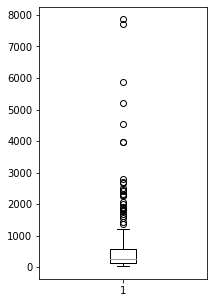

In [ ]:
fig, ax = plt.subplots(figsize=(3, 5))
ax.boxplot(dataset['creatinine_phosphokinase'])

Create outlier feature based on boolean condition, and drop records. 

In [ ]:
dataset['outlier'] = np.where(dataset['creatinine_phosphokinase'] < 6000, 0, 1)

This dataset is rather smaill, for a better result without more risks for overfitting, set the bechmark to 6,000 rather than 4,000. 

In [ ]:
#Find all outlier
dataset.loc[dataset['outlier']==1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,outlier
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,1
60,45.0,0,7702,1,25,1,390000.00,1.0,139,1,0,60,1,1


In [ ]:
#Drop the outlier
dataset = dataset.loc[dataset['outlier']==0]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       297 non-null    float64
 1   anaemia                   297 non-null    int64  
 2   creatinine_phosphokinase  297 non-null    int64  
 3   diabetes                  297 non-null    int64  
 4   ejection_fraction         297 non-null    int64  
 5   high_blood_pressure       297 non-null    int64  
 6   platelets                 297 non-null    float64
 7   serum_creatinine          297 non-null    float64
 8   serum_sodium              297 non-null    int64  
 9   sex                       297 non-null    int64  
 10  smoking                   297 non-null    int64  
 11  time                      297 non-null    int64  
 12  DEATH_EVENT               297 non-null    int64  
 13  outlier                   297 non-null    int64  
dtypes: float64

Outliers dropped. 

In [ ]:
#Delete the assistance column
dataset = dataset.iloc[:, :-1]

4.  Distribution diagram for \``creatinine_phosphokinase`\`  


In [ ]:
distributions('ejection_fraction', 'DEATH_EVENT', 'Ejection Fraction Distribution with Death Event')

Same as above, for not overfitting, ignore this single outlier. Plus, it's not very differently high from others. 

5.  Distribution diagram for \``serum_creatinine`\` 

In [ ]:
distributions('serum_creatinine', 'DEATH_EVENT', 'Serum Creatinine Distribution with Death Event')

Check with a boxplot too. 

{'boxes': [<matplotlib.lines.Line2D at 0x7f43a918ef28>],
 'caps': [<matplotlib.lines.Line2D at 0x7f43a911c978>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f43a9127438>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f43a91270b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f43a911c278>,
  <matplotlib.lines.Line2D at 0x7f43a911c5f8>]}

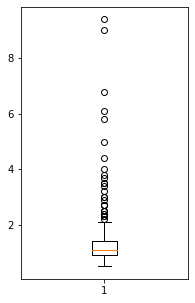

In [ ]:
fig, ax = plt.subplots(figsize=(3, 5))
ax.boxplot(dataset['serum_creatinine'])

Drop the out lier. 

In [ ]:
dataset['outlier'] = np.where(dataset['serum_creatinine'] < 8, 0, 1)

In [ ]:
dataset = dataset.loc[dataset['outlier']==0]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       295 non-null    float64
 1   anaemia                   295 non-null    int64  
 2   creatinine_phosphokinase  295 non-null    int64  
 3   diabetes                  295 non-null    int64  
 4   ejection_fraction         295 non-null    int64  
 5   high_blood_pressure       295 non-null    int64  
 6   platelets                 295 non-null    float64
 7   serum_creatinine          295 non-null    float64
 8   serum_sodium              295 non-null    int64  
 9   sex                       295 non-null    int64  
 10  smoking                   295 non-null    int64  
 11  time                      295 non-null    int64  
 12  DEATH_EVENT               295 non-null    int64  
 13  outlier                   295 non-null    int64  
dtypes: float64

In [ ]:
#Delete the assistance column
dataset = dataset.iloc[:, :-1]

6. Heatmap for correlations.

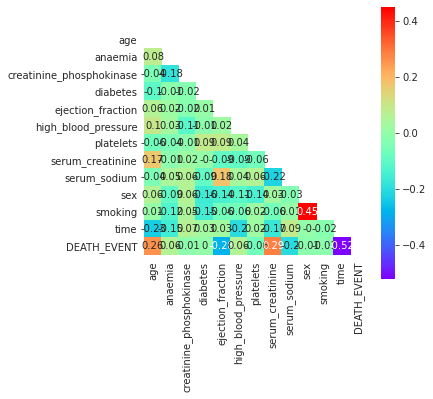

In [ ]:
plt.figure(figsize=(5,5))

mask = np.zeros_like(dataset.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(dataset.corr().round(2), mask=mask,
                     annot=True, cmap='rainbow', square=True)

As shown, the most related features with \``DEATH_EVENT`\` are \``age`\`, \``serum_creatinine`\`, \``time`\`. Then the  \``ejection_fraction`\` and  \``serum_sodium`\`. 

As I believed, \``time`\` is highly related due to the factual logic, could not be considered here. 

#### **Data Training & Prediction**

First, split the train and test data.

In [ ]:
target = dataset.iloc[:,-1:]
data = dataset.iloc[:, :-1]

X_train, X_test, Y_train, Y_test = train_test_split(data, target, random_state=1)

print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("Y train shape: ", Y_train.shape)
print("Y test shape: ", Y_test.shape)

X train shape:  (221, 12)
X test shape:  (74, 12)
Y train shape:  (221, 1)
Y test shape:  (74, 1)


In this part, two alogorithms would be appplied to train the models: one is Random Forests, and another is CNN. 

1. Random Forest

Try different estimators and choose the best one. 

In [ ]:
scores_rf = []
models_rf = []
# Try different estimators
for i in range(50):
  rfm = RandomForestClassifier(max_depth=5, n_estimators=i+1)
  rfm.fit(X_train, Y_train)

  score = rfm.score(X_test, Y_test)
  scores_rf.append(score)
  models_rf.append(rfm)

Show all the scores(accuracy) for all the situations. 

Text(0, 0.5, 'Score')

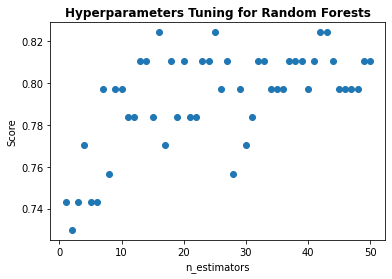

In [ ]:
plt.scatter(range(1,51), scores_rf)
plt.title('Hyperparameters Tuning for Random Forests', weight='bold')
plt.xlabel('n_estimators')
plt.ylabel('Score')

Choose the best one (max score). 

In [ ]:
rf = models_rf[scores_rf.index(max(scores_rf))]
rf.fit(X_train, Y_train)

rf.score(X_test, Y_test)

0.7972972972972973

Define the function for evaluations. 

In [ ]:
def eval_score(model, X_test, Y_test):

  predict = model.predict(X_test)

  # R2 Score 
  r2 = r2_score(Y_test, predict)
  print('r2 score: ', r2)
  # Mean Squared Error
  mse = mean_squared_error(Y_test, predict)
  print('mse score: ', mse)

  # Confusion Matrix
  print('Confusion Matrix : \n', confusion_matrix(Y_test, predict))

  # ROC_AUC
  probility = model.predict_proba(X_test)
  # Slice out the probaility
  ras = roc_auc_score(Y_test, probility[:, 1])
  print('ROC AUC Score: ', ras)
  # ROC curve
  fpr, tpr, thresholds = roc_curve(Y_test, probility[:, 1])
  plt.plot(fpr, tpr)
  plt.plot([0,1], [0,1], 'grey', linestyle='--')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')

  # Report
  print('Report: ')
  print(classification_report(Y_test, predict))

Evaluatioon for the Random Forests model.

r2 score:  0.053708439897698246
mse score:  0.20270270270270271
Confusion Matrix : 
 [[47  4]
 [11 12]]
ROC AUC Score:  0.8201193520886616
Report: 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        51
           1       0.75      0.52      0.62        23

    accuracy                           0.80        74
   macro avg       0.78      0.72      0.74        74
weighted avg       0.79      0.80      0.79        74



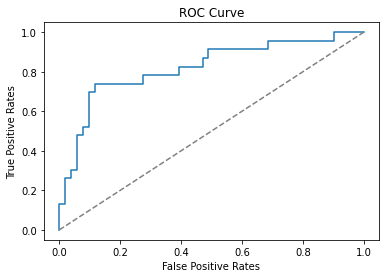

In [ ]:
eval_score(rf, X_test, Y_test)

**Causality** part.   


Install and import necessary package. 

There're many differently functioned packages: causalml, CausalInference, CausalGraphicalModels, doWhy from Microsoft and so on. Many are still under developing.  

1. doWhy

In [ ]:
!pip install dowhy

In [ ]:
from dowhy import CausalModel

What I meant to do here is to see the relationship between death rate and the smoking habit.   
Choose 100 observations at random to see that in how many cases do the variables; ‘DEATH_EVENT’ & ‘smoking’ attain the same values. This whole process is then repeated 1000 times. 

In [ ]:
counts_sum=0
for i in range(1,1000):
        counts_i = 0
        rdf = dataset.sample(100)
        counts_i = rdf[rdf['DEATH_EVENT'] == rdf['smoking']].shape[0]
        counts_sum+= counts_i
counts_sum/1000

The expected count turns out to be 55.972% which is almost 50%.   
\
Now consider the scenario when there were no changes and recalculate the expected count.

In [ ]:
counts_sum=0
for i in range(1,1000):
        counts_i = 0
        rdf = dataset[dataset['anaemia'] >= 0].sample(100)
        counts_i = rdf[rdf['DEATH_EVENT']== rdf['smoking']].shape[0]
        counts_sum += counts_i
counts_sum/1000

The expected count turns out to be 56.175%.   
\
It gives a hint that anaemia be a confounding variable.

**Create a Causal Graph**  
Install the package. 

In [ ]:
# import sys, setuptools, tokenize
# !pip install pygraphviz
!apt-get install -y graphviz-dev

In [ ]:
!pip install pygraphviz

In [ ]:
import pygraphviz
causal_graph = """digraph {
DEATH_EVENT[label="Death_Event"];
smoking[label="Whether having smoking habit"];
anaemia[label="Whether having anaemia"];
diabetes[label="Whether having diabetes"];
high_blood_pressure[label="Whether having high_blood_pressure"];
time[label="Follow-up Time"];
U[label="Unobserved Confounders"];
 

smoking -> anaemia;
diabetes -> time;
anaemia -> time;
high_blood_pressure -> time;
time -> DEATH_EEVENT;
}"""

# sex[label="Sex"];
# creatinine_phosphokinase;
# ejection_fraction;
# platelets;
# serum_creatinine;
# serum_sodium;   



In [ ]:
import dowhy
model= dowhy.CausalModel(
        data = dataset,
        graph=causal_graph.replace("\n", " "),
        treatment='smoking',
        outcome='DEATH_EVENT')
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

   
### **Conclusion**  

Causal Inference is a newly topic these years which is not easy to develop. The conception is not hard, but still how to define the treament for various situations is still a challenge. It still has a promising and influential in the future ML. 

   
### **Reference** 

[1] Explainable AI: Interpreting, Explaining and Visualizing Deep Learning https://link.springer.com/book/10.1007/978-3-030-28954-6   
[2] The Three Layer Causal Hierarchy http://web.cs.ucla.edu/~kaoru/3-layer-causal-hierarchy.pdf  
[3] Holland, Paul W. “Statistics and Causal Inference.” Journal of the American Statistical Association, vol. 81, no. 396, 1986, pp. 945–960. JSTOR, www.jstor.org/stable/2289064. Accessed 7 July 2020.  
[4] doWhy https://microsoft.github.io/dowhy/index.html 
[5] causalml https://causalml.readthedocs.io/en/latest/about.html 